In [12]:
!pip install lime

     |████████████████████████████████| 275 kB 2.0 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=d4662064b634fc10d839d1e7c74027cf12d90709774d1a2d711dafbe8278d4d4
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [25]:
import pandas as pd
import os
import requests
import io
import matplotlib.pyplot as plt
import numpy as np
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
import operator
import re
import seaborn as sns
from wordcloud import WordCloud
from lime import lime_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
path ='https://raw.githubusercontent.com/iAnkitar/ISR_Spotlight/master/train.csv'
r = requests.get(path)
train_df = pd.read_csv(io.StringIO(r.text),header=0)

train_df.sample(5)

,stance,message,tweetid
14627,2,South Dakota national park tweets facts about ...,833638
15168,1,This deplorable minion hates #marriage equalit...,647944
2756,1,RT @voxdotcom: TrumpÃ¢â‚¬â„¢s election marks t...,704101
8142,2,RT @TheEconomist: The ocean is the planet's li...,296866
6852,1,RT @RwandaResources: '#EastAfrica is one ecosy...,361576


In [3]:
#Dropping the news from the database
train_df = train_df.drop(train_df[train_df.stance == 2].index)
print(train_df['stance'].value_counts())

 1    8530
 0    2353
-1    1296
Name: stance, dtype: int64


In [4]:
x = train_df['message']
y = train_df['stance']

In [5]:
stop_words = stopwords.words('english')
stemmer = PorterStemmer()

In [6]:
#Preprocessing the data
cleaned_data=[]
for i in range(len(x)):
   tweet = re.sub('[^a-zA-Z]',' ',x.iloc[i])
   tweet = tweet.lower().split()
   tweet = [stemmer.stem(word) for word in tweet if (word not in stop_words)]
   tweet = ' '.join(tweet)
   cleaned_data.append(tweet)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

cv = CountVectorizer(max_features=3000)
X_fin = cv.fit_transform(cleaned_data).toarray()

In [8]:
#setting the model as Multinomial Naive Bayes
model = MultinomialNB()

In [9]:
#Spliting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X_fin,y,test_size=0.3)
model.fit(X_train,y_train)

MultinomialNB()

In [10]:
#Predicting the stance values for test data
y_pred = model.predict(X_test)

In [11]:
#Printing the report 
cf = classification_report(y_test,y_pred)
print(cf)

              precision    recall  f1-score   support

          -1       0.60      0.54      0.57       386
           0       0.51      0.48      0.50       712
           1       0.83      0.86      0.85      2556

    accuracy                           0.75      3654
   macro avg       0.65      0.63      0.64      3654
weighted avg       0.75      0.75      0.75      3654



Accuracy: 0.75
Detail:


(array([0.5, 1.5, 2.5]), <a list of 3 Text major ticklabel objects>)

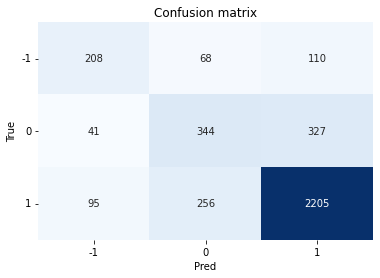

In [43]:
import sklearn.metrics as metrics
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, y_pred)
# auc = metrics.roc_auc_score(y_test, predicted_prob, 
#                             multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
# print("Auc:", round(auc,2))
print("Detail:")
#print(metrics.classification_report(y_test, y_pred))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

